# gdp per capita and hk recycling volume per day

Model Summary:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.191e+04   1153.101     10.329      0.000    9488.255    1.43e+04
HK GDP per capita    -0.0184      0.004     -4.959      0.000      -0.026      -0.011

R-squared: 0.5774


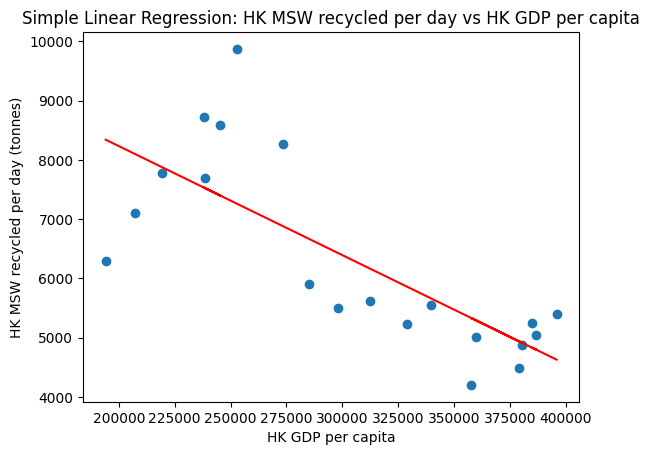

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK MSW recycled per day vs HK GDP per capita

# Prepare data
# Make sure the relevant columns are numeric
df["HK GDP per capita"] = pd.to_numeric(df["HK GDP per capita"], errors="coerce")
df["HK total MSW recycled (tonnes)"] = pd.to_numeric(
    df["HK total MSW recycled (tonnes)"], errors="coerce"
)

# Add number of days in each year (leap years: 2004, 2008, 2012, 2016, 2020, 2024)
leap_years = [2004, 2008, 2012, 2016, 2020, 2024]
df["Year"] = df["Year"].astype("Int64")
df["days_in_year"] = df["Year"].apply(
    lambda y: 366 if (pd.notna(y) and int(y) in leap_years) else 365
)

# Compute HK MSW recycled per day (tonnes/day)
df["HK MSW recycled per day (tonnes)"] = (
    df["HK total MSW recycled (tonnes)"] / df["days_in_year"]
)

# Keep only rows where both variables are available
mask = (
    df["HK GDP per capita"].notna()
    & df["HK MSW recycled per day (tonnes)"].notna()
)
X4 = df.loc[mask, ["HK GDP per capita"]]
y4 = df.loc[mask, "HK MSW recycled per day (tonnes)"]

# Fit model using sklearn for predictions
lin_reg4 = LinearRegression()
lin_reg4.fit(X4, y4)

# Fit model using statsmodels for statistical tests
X4_sm = sm.add_constant(X4)  # Add constant term for intercept
model4 = sm.OLS(y4, X4_sm)
results4 = model4.fit()

# Predictions for plotting
y_pred4 = lin_reg4.predict(X4)

print("Model Summary:")
print(results4.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results4.rsquared:.4f}")

# Plot
plt.scatter(X4, y4)
plt.plot(X4, y_pred4, color='red')
plt.xlabel('HK GDP per capita')
plt.ylabel('HK MSW recycled per day (tonnes)')
plt.title('Simple Linear Regression: HK MSW recycled per day vs HK GDP per capita')
plt.show()


**GDP per capita coefficient ($\hat \beta_1$) ≈ -0.0184 (p < 0.001 < 0.05)**  

- There is a **statistically significant negative association** between HK GDP per capita and the daily volume of MSW recycled. As GDP per capita increases, the amount of waste recycled per day tends to **slightly decrease**.  

- The **R-squared is moderate (~0.58)**, meaning GDP per capita explains **around 58% of the variation** in daily recycling volume; the remaining variation is likely driven by other factors such as waste management policies, market demand for recyclables, and residents’ recycling behaviour.
